In [1]:
# Data set: https://www.kaggle.com/mirichoi0218/insurance
# Method: multiple regression

# To help visualize the difference between simple and multiple regression:
# Simple regression (2d space): We have a 2d coordinage system, where we try to find the best line for all data points.
# Multiple Regression (3d space): We have 3d coordinate system, where we try to find the best plain for all data points.
# Mutiple Regression (xd space): Same principle, but hard to imagine.
# import matplotlib.pyplot as plt

In [4]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

In [86]:
# Load raw data.
raw_insurance_data = pd.read_csv('insurance.csv', sep=',',header=1).values
print(raw_insurance_data[0])

# Shuffle data.
raw_insurance_data = shuffle(raw_insurance_data, random_state=0)
print(raw_insurance_data)

# Split into train data and train targets.
insurance_data_x = raw_insurance_data[:, 0:5] # TODO: handle location also
insurance_data_y = raw_insurance_data[:, 6]
print(insurance_data_x[0])
print(insurance_data_y[0])

# Replace gender with a number. 0 - male, 1 - female.
for i in insurance_data_x:
    if i[1] == 'male':
        i[1] = 0
    else:
        i[1] = 1
print(insurance_data_x)

# Replace smoker with a number. 0 - no smoker, 1 - smoker.
for i in insurance_data_x:
    if i[4] == 'no':
        i[4] = 0
    else:
        i[4] = 1
print(insurance_data_x)

# Normalize all values between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
v = insurance_data_x[:]
v_scaled = min_max_scaler.fit_transform(v)
insurance_data_x = v_scaled
print(insurance_data_x)

# Save some values later for manual for testing.
insurance_data_x_not_used_for_learning = insurance_data_x[-10:]
insurance_data_y_not_used_for_learning = insurance_data_y[-10:]
insurance_data_x = insurance_data_x[:-10]
insurance_data_y = insurance_data_y[:-10]
print(len(insurance_data_x_not_used_for_learning))
print(len(insurance_data_y_not_used_for_learning))
print(len(insurance_data_x))
print(len(insurance_data_y))

[18 'male' 33.77 1 'no' 'southeast' 1725.5523]
[[18 'female' 39.82 ... 'no' 'southeast' 1633.9618]
 [47 'female' 29.37 ... 'no' 'southeast' 8547.6913]
 [46 'female' 32.3 ... 'no' 'northeast' 9411.005]
 ...
 [29 'male' 37.29 ... 'no' 'southeast' 4058.1161]
 [46 'female' 19.95 ... 'no' 'northwest' 9193.8385]
 [53 'male' 26.41 ... 'no' 'northeast' 11244.3769]]
[18 'female' 39.82 0 'no']
1633.9618
[[18 1 39.82 0 'no']
 [47 1 29.37 1 'no']
 [46 1 32.3 2 'no']
 ...
 [29 0 37.29 2 'no']
 [46 1 19.95 2 'no']
 [53 0 26.41 2 'no']]
[[18 1 39.82 0 0]
 [47 1 29.37 1 0]
 [46 1 32.3 2 0]
 ...
 [29 0 37.29 2 0]
 [46 1 19.95 2 0]
 [53 0 26.41 2 0]]
[[0.         1.         0.64191552 0.         0.        ]
 [0.63043478 1.         0.36077482 0.2        0.        ]
 [0.60869565 1.         0.43960183 0.4        0.        ]
 ...
 [0.23913043 0.         0.57384988 0.4        0.        ]
 [0.60869565 1.         0.10734463 0.4        0.        ]
 [0.76086957 0.         0.2811407  0.4        0.        ]]
10
10

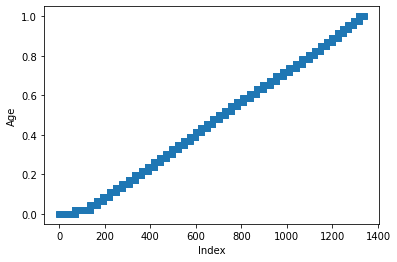

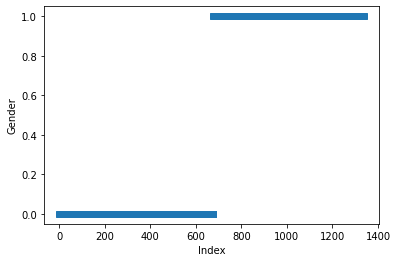

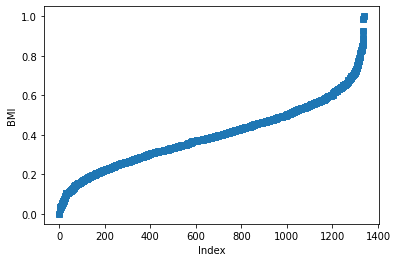

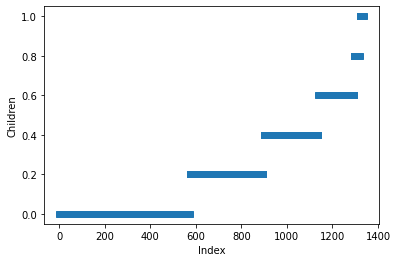

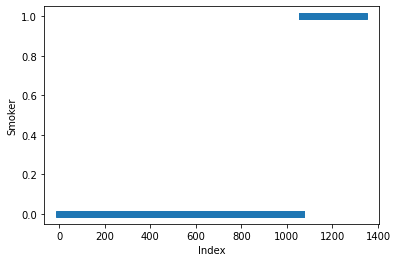

In [50]:
# Plot distributions of the dimensions.
age_data = insurance_data_x[:,0]
age_data.sort()
plt.plot(range(1, len(age_data) + 1), age_data, 's') 
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

gender_data = insurance_data_x[:,1]
gender_data.sort()
plt.plot(range(1, len(gender_data) + 1), gender_data, 's') 
plt.xlabel('Index')
plt.ylabel('Gender')
plt.show()

bmi_data = insurance_data_x[:,2]
bmi_data.sort()
plt.plot(range(1, len(bmi_data) + 1), bmi_data, 's') 
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

children_data = insurance_data_x[:,3]
children_data.sort()
plt.plot(range(1, len(children_data) + 1), children_data, 's') 
plt.xlabel('Index')
plt.ylabel('Children')
plt.show()

smoker_data = insurance_data_x[:,4]
smoker_data.sort()
plt.plot(range(1, len(smoker_data) + 1), smoker_data, 's') 
plt.xlabel('Index')
plt.ylabel('Smoker')
plt.show()

In [80]:
# Split into train and validation data.
insurance_data_x_train = insurance_data_x_shuffled[:-200]
insurance_data_x_val =insurance_data_x_shuffled[-200:]
insurance_data_y_train = insurance_data_y_shuffled[:-200]
insurance_data_y_val =insurance_data_y_shuffled[-200:]
print(insurance_data_x_train)
print(insurance_data_x_val)
print(insurance_data_y_train)
print(insurance_data_y_val)

[[0.93478261 1.         0.65079365 0.6        1.        ]
 [0.41304348 0.         0.37261232 0.2        0.        ]
 [0.23913043 0.         0.3023944  0.         0.        ]
 ...
 [0.65217391 1.         0.47027172 0.4        0.        ]
 [0.15217391 0.         0.26324993 0.         0.        ]
 [0.02173913 0.         0.14823783 0.         0.        ]]
[[0.56521739 1.         0.43449018 0.2        0.        ]
 [0.34782609 0.         0.34813021 0.         0.        ]
 [0.67391304 1.         0.48210923 0.4        0.        ]
 [0.89130435 1.         0.62119989 0.6        1.        ]
 [0.58695652 1.         0.43960183 0.2        0.        ]
 [0.45652174 0.         0.385795   0.2        0.        ]
 [0.89130435 1.         0.60344364 0.6        1.        ]
 [0.43478261 0.         0.3755717  0.2        0.        ]
 [0.08695652 0.         0.22491256 0.         0.        ]
 [0.73913043 1.         0.52031208 0.4        0.        ]
 [0.89130435 1.         0.61824052 0.6        1.        ]
 [0.9130

In [82]:
# Build and train our model.
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu',input_shape=(insurance_data_x.shape[1],))) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 

history = model.fit(insurance_data_x_train, insurance_data_y_train,
                        validation_data=(insurance_data_x_val, insurance_data_y_val),
                        epochs=500, batch_size=1)

Train on 1137 samples, validate on 200 samples
Epoch 1/500
1137/1137 [==============================] - 1s 867us/step - loss: 319125116.5839 - mae: 13016.8037 - val_loss: 257469464.8389 - val_mae: 11225.8213
Epoch 2/500
1137/1137 [==============================] - 1s 685us/step - loss: 247008121.8210 - mae: 10441.4551 - val_loss: 169545034.1297 - val_mae: 8446.6035
Epoch 3/500
1137/1137 [==============================] - 1s 676us/step - loss: 184845405.5638 - mae: 9151.4814 - val_loss: 147303625.2159 - val_mae: 8415.0283
Epoch 4/500
1137/1137 [==============================] - 1s 677us/step - loss: 171912073.8513 - mae: 9253.5566 - val_loss: 143800181.6845 - val_mae: 8378.3076
Epoch 5/500
1137/1137 [==============================] - 1s 677us/step - loss: 167792812.7037 - mae: 9161.2900 - val_loss: 140716948.2434 - val_mae: 8450.1416
Epoch 6/500
1137/1137 [==============================] - 1s 717us/step - loss: 164030205.3359 - mae: 9101.1104 - val_loss: 138395157.7364 - val_mae: 8392.1

Epoch 52/500
1137/1137 [==============================] - 1s 675us/step - loss: 150922592.3262 - mae: 8979.1777 - val_loss: 134921525.9361 - val_mae: 8217.3115
Epoch 53/500
1137/1137 [==============================] - 1s 687us/step - loss: 151002344.6588 - mae: 8987.9248 - val_loss: 135108179.3267 - val_mae: 8168.1836
Epoch 54/500
1137/1137 [==============================] - 1s 707us/step - loss: 150978384.8759 - mae: 8984.0303 - val_loss: 135202900.7075 - val_mae: 8146.7173
Epoch 55/500
1137/1137 [==============================] - 1s 711us/step - loss: 151370663.3389 - mae: 8951.2295 - val_loss: 134796091.7987 - val_mae: 8300.0498
Epoch 56/500
1137/1137 [==============================] - 1s 705us/step - loss: 150868266.3241 - mae: 9026.0664 - val_loss: 135129082.8453 - val_mae: 8165.4224
Epoch 57/500
1137/1137 [==============================] - 1s 695us/step - loss: 151015223.8192 - mae: 8970.4863 - val_loss: 134903431.4194 - val_mae: 8195.8896
Epoch 58/500
1137/1137 [================

KeyboardInterrupt: 